In [2]:
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np.load = np_load_old

In [26]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
decode_review(train_data[1])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 2s 147us/step - loss: 0.5067 - acc: 0.7849 - val_loss: 0.3794 - val_acc: 0.8698
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2998 - acc: 0.9052 - val_loss: 0.2998 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.2170 - acc: 0.9284 - val_loss: 0.3084 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1741 - acc: 0.9437 - val_loss: 0.2841 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1416 - acc: 0.9547 - val_loss: 0.2852 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1139 - acc: 0.9655 - val_loss: 0.3159 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0969 - acc: 0.9707 - val_loss: 0

In [9]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

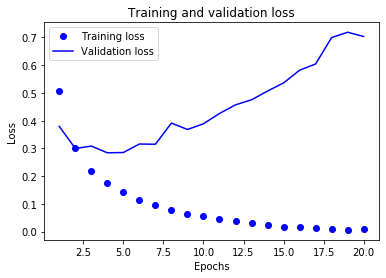

In [14]:
import matplotlib.pyplot as plt
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

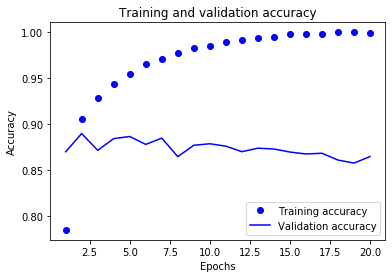

In [15]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 69us/step


[0.49952465612888336, 0.85896]

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4553 - acc: 0.8328
Epoch 2/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.2643 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2032 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step


[0.2882660409641266, 0.88572]

In [35]:
predicted = model.predict(x_test)
def check_review(index):
    print(predicted[index])
    print(decode_review(test_data[index]))
check_review(7)

[0.00925866]
? the ? richard ? dog is ? to ? joan fontaine dog however when ? bing crosby arrives in town to sell a record player to the emperor his dog is attacked by ? dog after a revenge attack where ? is ? from town a ? insists that ? dog must confront dog so that she can overcome her ? fears this is arranged and the dogs fall in love so do ? and ? the rest of the film passes by with romance and at the end ? dog gives birth but who is the father br br the dog story is the very weak vehicle that is used to try and create a story between humans its a terrible storyline there are 3 main musical pieces all of which are rubbish bad songs and dreadful choreography its just an extremely boring film bing has too many words in each sentence and delivers them in an almost irritating manner its not funny ever but its meant to be bing and joan have done much better than this


In [63]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse',metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1562 - acc: 0.7765 - val_loss: 0.1086 - val_acc: 0.8555
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.0752 - acc: 0.9067 - val_loss: 0.0846 - val_acc: 0.8868
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.0545 - acc: 0.9316 - val_loss: 0.1018 - val_acc: 0.8607
Epoch 4/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.0419 - acc: 0.9497 - val_loss: 0.0914 - val_acc: 0.8790
Epoch 5/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.0346 - acc: 0.9583 - val_loss: 0.0882 - val_acc: 0.8835
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.0269 - acc: 0.9684 - val_loss: 0.0967 - val_acc: 0.8716
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.0230 - acc: 0.9737 - val_loss: 0.1027 - 

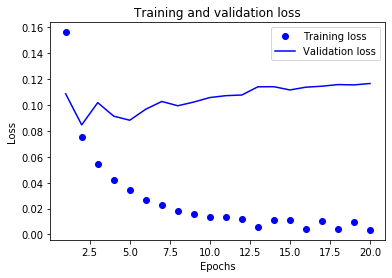

In [64]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

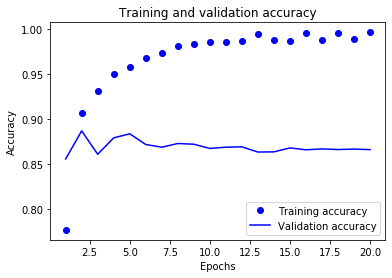

In [65]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.1345 - acc: 0.8166
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.0680 - acc: 0.9118
Epoch 3/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.0544 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step


[0.09325311609923839, 0.87476]